In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\Ignacio\\Desktop\\Ciencia de datos\\furniture\\Furniture Price Prediction.csv")

In [3]:
data = pd.DataFrame(data)

Furniture: it has the furniture name
Type: it has the type of furniture
Url: it has the link to the furniture page
Rate: it has the rate of furniture
note ==> 0 means that the furniture is not rated
Delivery: it has the price of delivery to a house
Sale: it has the percentage of discounts on furniture
Price: it has the price of furniture

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   furniture  2000 non-null   object 
 1   type       2000 non-null   object 
 2   url        2000 non-null   object 
 3   rate       2000 non-null   float64
 4   delivery   2000 non-null   float64
 5   sale       2000 non-null   object 
 6   price      1961 non-null   float64
dtypes: float64(3), object(4)
memory usage: 109.5+ KB


In [5]:
missing_values_count = data.isnull().sum()
missing_values_count

furniture     0
type          0
url           0
rate          0
delivery      0
sale          0
price        39
dtype: int64

In [6]:
data.dropna(axis = 0)

,furniture,type,url,rate,delivery,sale,price
0,Bed side table with storage shelf,Home Decor Center,https://www.jumia.com.eg//ar/home-decor-center...,3.3,172.14,72%,2500.0
1,Bed side table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,54%,1200.0
2,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,18%,1099.0
3,Bedside table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,58%,1200.0
4,Wall Mounted TV Unit with Cabinet TV Stand Uni...,Modern Home,https://www.jumia.com.eg//ar/modern-home-wall-...,5.0,52.44,54%,1400.0
...,...,...,...,...,...,...,...
1995,Casio Standard Analogue Ladys Standard Analog ...,Casio Standard Analogue Ladys Standard Analog ...,https://www.jumia.com.eg//ar/casio-standard-an...,0.0,656.28,0%,1632.0
1996,Coffee table + side table,Hub Furniture,https://www.jumia.com.eg//ar/hub-furniture-ae-...,0.0,172.14,0%,11450.0
1997,Ben Togo Baby Bed,Bean GO,https://www.jumia.com.eg//ar/bean2go-newborn-b...,0.0,52.44,0%,550.0
1998,Cloud memory foam mattress (medical),CIREM,https://www.jumia.com.eg//ar/cirem-cloud-memor...,0.0,172.14,9%,8495.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   furniture  2000 non-null   object 
 1   type       2000 non-null   object 
 2   url        2000 non-null   object 
 3   rate       2000 non-null   float64
 4   delivery   2000 non-null   float64
 5   sale       2000 non-null   object 
 6   price      1961 non-null   float64
dtypes: float64(3), object(4)
memory usage: 109.5+ KB


In [8]:
#convierto los porcentajes en decimales
data["sale"] = data["sale"].str.rstrip("%").astype(float)/100

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   furniture  2000 non-null   object 
 1   type       2000 non-null   object 
 2   url        2000 non-null   object 
 3   rate       2000 non-null   float64
 4   delivery   2000 non-null   float64
 5   sale       2000 non-null   float64
 6   price      1961 non-null   float64
dtypes: float64(4), object(3)
memory usage: 109.5+ KB


In [10]:
data["type"]

0                                       Home Decor Center
1                                             Modern Home
2                                             Modern Home
3                                             Modern Home
4                                             Modern Home
                              ...                        
1995    Casio Standard Analogue Ladys Standard Analog ...
1996                                        Hub Furniture
1997                                              Bean GO
1998                                                CIREM
1999                                                CIREM
Name: type, Length: 2000, dtype: object

In [11]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
datos = pd.DataFrame(data)
group = datos[["furniture","type"]]
datos[["furniture","type"]] = pd.DataFrame(ordinal_encoder.fit_transform(group))
ordinal_encoder.categories_

[array([' Pad Clip Holder Folder Plastic Clipboard Blue Purple for p',
        ' Sprayer model coloring  art drawing',
        ' stool folding 2 step folding step stool', ...,
        'مكتب قابل للطي على الحائط 60 × 40 سم أبيض',
        'مكتب قابل للطي على الحائط 60 × 40 سم رمادي',
        'مكتب قابل للطي على الحائط 90 × 50 سم أبيض'], dtype=object),
 array(['A  Magnetic Whiteboard Sheet For Kitchen Fridge With',
        'Adjustable Angle Foldable Portable Reading Book Stand Document Holder Green',
        'Adjustable Anti Shake Bed Frame Tool', 'Ahda Deco',
        'Ahda Deco Classic Floral Style Fold able Tables Set    Pcs',
        'Ahda Deco Fold able Table With Mandala Style      x    x   cm',
        'Alphabet Shaped Iron Metal Bookends Support Holder Desk Stands For Books Blue',
        'Aluminum Alloy Laptop Table Folding Notebook Desktop Stand with Cooling Fan Bed Laptop Tray Desk Study Desk',
        'Aluminum Coffee Lid for Nespresso Vertuoline Coffee Capsule',
        'Anti 

In [12]:
datos["furniture"]

0        193.0
1        193.0
2        746.0
3        199.0
4       1140.0
         ...  
1995     267.0
1996     300.0
1997     217.0
1998     285.0
1999     307.0
Name: furniture, Length: 2000, dtype: float64

In [13]:
max(datos["furniture"])

1223.0

In [14]:
max(datos["type"])

591.0

In [15]:
repetidos_type = datos["type"].value_counts()

In [16]:
repetidos_type.iloc[:20]

272.0    678
417.0     81
253.0     57
145.0     51
26.0      44
13.0      43
159.0     38
35.0      37
99.0      33
186.0     24
402.0     20
29.0      17
454.0     17
400.0     16
124.0     16
119.0     15
22.0      15
213.0     15
215.0     14
157.0     14
Name: type, dtype: int64

In [17]:
datos["type"]

0       173.0
1       272.0
2       272.0
3       272.0
4       272.0
        ...  
1995     53.0
1996    213.0
1997     35.0
1998     45.0
1999     45.0
Name: type, Length: 2000, dtype: float64

In [18]:
#obteniendo los 20 valores mas repetidos y calculando el porcentaje
percent_most = repetidos_type.iloc[:20]*100/2000
percent_most

272.0    33.90
417.0     4.05
253.0     2.85
145.0     2.55
26.0      2.20
13.0      2.15
159.0     1.90
35.0      1.85
99.0      1.65
186.0     1.20
402.0     1.00
29.0      0.85
454.0     0.85
400.0     0.80
124.0     0.80
119.0     0.75
22.0      0.75
213.0     0.75
215.0     0.70
157.0     0.70
Name: type, dtype: float64

In [19]:
datos["type"]==272.0

0       False
1        True
2        True
3        True
4        True
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: type, Length: 2000, dtype: bool

In [20]:
datos.loc[datos["type"]==272.0]

,furniture,type,url,rate,delivery,sale,price
1,193.0,272.0,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,0.54,1200.0
2,746.0,272.0,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,0.18,1099.0
3,199.0,272.0,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,0.58,1200.0
4,1140.0,272.0,https://www.jumia.com.eg//ar/modern-home-wall-...,5.0,52.44,0.54,1400.0
6,759.0,272.0,https://www.jumia.com.eg//ar/modern-home-offic...,4.1,52.44,0.53,2000.0
...,...,...,...,...,...,...,...
1978,351.0,272.0,https://www.jumia.com.eg//ar/cozy-cozybeanbag-...,0.0,52.44,0.00,600.0
1979,347.0,272.0,https://www.jumia.com.eg//ar/cozy-comfy-beanba...,0.0,52.44,0.00,499.0
1980,348.0,272.0,https://www.jumia.com.eg//ar/cozy-comfy-beanba...,0.0,52.44,0.00,650.0
1983,560.0,272.0,https://www.jumia.com.eg//ar/generic-home-gall...,0.0,52.44,0.17,1794.0


In [21]:
data.loc[1]

furniture                   Bed side table with storage shelf 
type                                               Modern Home
url          https://www.jumia.com.eg//ar/modern-home-bedsi...
rate                                                       0.0
delivery                                                172.14
sale                                                      0.54
price                                                   1200.0
Name: 1, dtype: object

The most popular is Modern Home

In [22]:
datos.loc[datos["type"]==417.0]

,furniture,type,url,rate,delivery,sale,price
163,956.0,417.0,https://www.jumia.com.eg//ar/rango-romantic-ch...,4.3,172.14,0.10,3000.0
196,936.0,417.0,https://www.jumia.com.eg//ar/rango-bed-100-x-1...,3.0,172.14,0.13,4000.0
229,1029.0,417.0,https://www.jumia.com.eg//ar/rango-bed-sofa-te...,4.1,172.14,0.18,4000.0
244,1060.0,417.0,https://www.jumia.com.eg//ar/rango-corner-bed-...,5.0,172.14,0.07,7500.0
276,1029.0,417.0,https://www.jumia.com.eg//ar/rango-sofa-bed-12...,0.0,172.14,0.18,4000.0
...,...,...,...,...,...,...,...
1804,276.0,417.0,https://www.jumia.com.eg//ar/rango-chaise-loun...,4.0,172.14,0.17,3000.0
1811,676.0,417.0,https://www.jumia.com.eg//ar/rango-31-sofa-bed...,0.0,172.14,0.18,4000.0
1826,1024.0,417.0,https://www.jumia.com.eg//ar/rango-sofa-bed-gr...,4.0,172.14,0.13,4000.0
1871,1029.0,417.0,https://www.jumia.com.eg//ar/rango-high-bed-so...,0.0,172.14,0.14,7000.0


In [23]:
data.loc[163]

furniture                                       Romance chair 
type                                                     Rango
url          https://www.jumia.com.eg//ar/rango-romantic-ch...
rate                                                       4.3
delivery                                                172.14
sale                                                       0.1
price                                                   3000.0
Name: 163, dtype: object

The second most popular is Rango

In [24]:
datos.loc[datos["type"]==253.0]

,furniture,type,url,rate,delivery,sale,price
176,751.0,253.0,https://www.jumia.com.eg//ar/marfy-touch-one-m...,5.0,52.44,0.60,3800.0
334,741.0,253.0,https://www.jumia.com.eg//ar/marfy-touch-moder...,5.0,52.44,0.24,10000.0
344,1076.0,253.0,https://www.jumia.com.eg//ar/marfy-touch-3-woo...,0.0,172.14,0.56,2500.0
345,1208.0,253.0,https://www.jumia.com.eg//ar/marfy-touch-pract...,4.5,52.44,0.43,1500.0
394,744.0,253.0,https://www.jumia.com.eg//ar/marfy-touch-moder...,0.0,172.14,0.31,4500.0
405,403.0,253.0,https://www.jumia.com.eg//ar/marfy-touch-disti...,0.0,52.44,0.40,6000.0
504,771.0,253.0,https://www.jumia.com.eg//ar/marfy-touch-moder...,0.0,172.14,0.40,4500.0
511,96.0,253.0,https://www.jumia.com.eg//ar/portable-table-la...,3.5,52.44,0.56,1600.0
552,528.0,253.0,https://www.jumia.com.eg//ar/marfy-touch-moder...,4.0,52.44,0.16,3700.0
569,82.0,253.0,https://www.jumia.com.eg//ar/marfy-touch-moder...,3.0,52.44,0.28,10500.0


In [25]:
data.iloc[176]

furniture                   Modern chair for different places 
type                                               Marfy Touch
url          https://www.jumia.com.eg//ar/marfy-touch-one-m...
rate                                                       5.0
delivery                                                 52.44
sale                                                       0.6
price                                                   3800.0
Name: 176, dtype: object

The third most popular is Marfy Touch

In [26]:
datos.loc[datos["type"]==145.0]

,furniture,type,url,rate,delivery,sale,price
22,193.0,145.0,https://www.jumia.com.eg//ar/general-bedside-t...,0.0,172.14,0.00,1000.00
39,740.0,145.0,https://www.jumia.com.eg//ar/general-modern-tv...,0.0,172.14,0.29,1200.00
62,193.0,145.0,https://www.jumia.com.eg//ar/general-bedside-t...,0.0,172.14,0.00,1000.00
79,740.0,145.0,https://www.jumia.com.eg//ar/general-modern-tv...,0.0,172.14,0.29,1200.00
89,759.0,145.0,https://www.jumia.com.eg//ar/general-office-wi...,5.0,52.44,0.60,2200.00
124,1069.0,145.0,https://www.jumia.com.eg//ar/general-modern-tv...,0.0,172.14,0.35,2000.00
131,524.0,145.0,https://www.jumia.com.eg//ar/general-high-swiv...,0.0,52.44,0.33,2000.00
219,98.0,145.0,https://www.jumia.com.eg//ar/general-r102-mode...,0.0,52.44,0.64,550.00
313,759.0,145.0,https://www.jumia.com.eg//ar/general-office-wi...,0.0,52.44,0.53,1900.00
365,759.0,145.0,https://www.jumia.com.eg//ar/general-modern-of...,0.0,52.44,0.54,1850.00


In [27]:
data.loc[22]

furniture                   Bed side table with storage shelf 
type                                                   General
url          https://www.jumia.com.eg//ar/general-bedside-t...
rate                                                       0.0
delivery                                                172.14
sale                                                       0.0
price                                                   1000.0
Name: 22, dtype: object

The fourth most popular is General

In [28]:
datos.loc[datos["type"]==26.0]

,furniture,type,url,rate,delivery,sale,price
162,762.0,26.0,https://www.jumia.com.eg//ar/artistico-modern-...,4.5,172.14,0.16,8000.0
212,1196.0,26.0,https://www.jumia.com.eg//ar/artistico-office-...,4.7,52.44,0.27,2200.0
336,762.0,26.0,https://www.jumia.com.eg//ar/artistico-modern-...,5.0,172.14,0.11,6500.0
438,386.0,26.0,https://www.jumia.com.eg//ar/artistico-domino-...,5.0,172.14,0.10,3300.0
513,706.0,26.0,https://www.jumia.com.eg//ar/artistico-metal-d...,5.0,52.44,0.17,3000.0
517,1197.0,26.0,https://www.jumia.com.eg//ar/artistico-modern-...,0.0,52.44,0.09,6000.0
547,706.0,26.0,https://www.jumia.com.eg//ar/artistico-metal-d...,5.0,52.44,0.22,3000.0
610,523.0,26.0,https://www.jumia.com.eg//ar/artistico-high-qu...,0.0,172.14,0.33,3000.0
630,1196.0,26.0,https://www.jumia.com.eg//ar/artistico-office-...,5.0,52.44,0.23,2200.0
664,1193.0,26.0,https://www.jumia.com.eg//ar/artistico-kids-ch...,0.0,52.44,0.27,1500.0


In [29]:
data.iloc[162]

furniture                         Modern dining table + chairs
type                                                 Artistico
url          https://www.jumia.com.eg//ar/artistico-modern-...
rate                                                       4.5
delivery                                                172.14
sale                                                      0.16
price                                                   8000.0
Name: 162, dtype: object

The fith most popular is Artistico

#### Summing up: The most popular type of furniture is the Modern Home, concentrating 33.9% of purchases. The second most popular is Rango with 4.05%, the third is Marfy Touch with 2.85%, the fourth is General with 2.55% and the fifth is Artistic with 2.20%.

Text(0.5, 1.0, 'Percentage of most popular types of furniture')

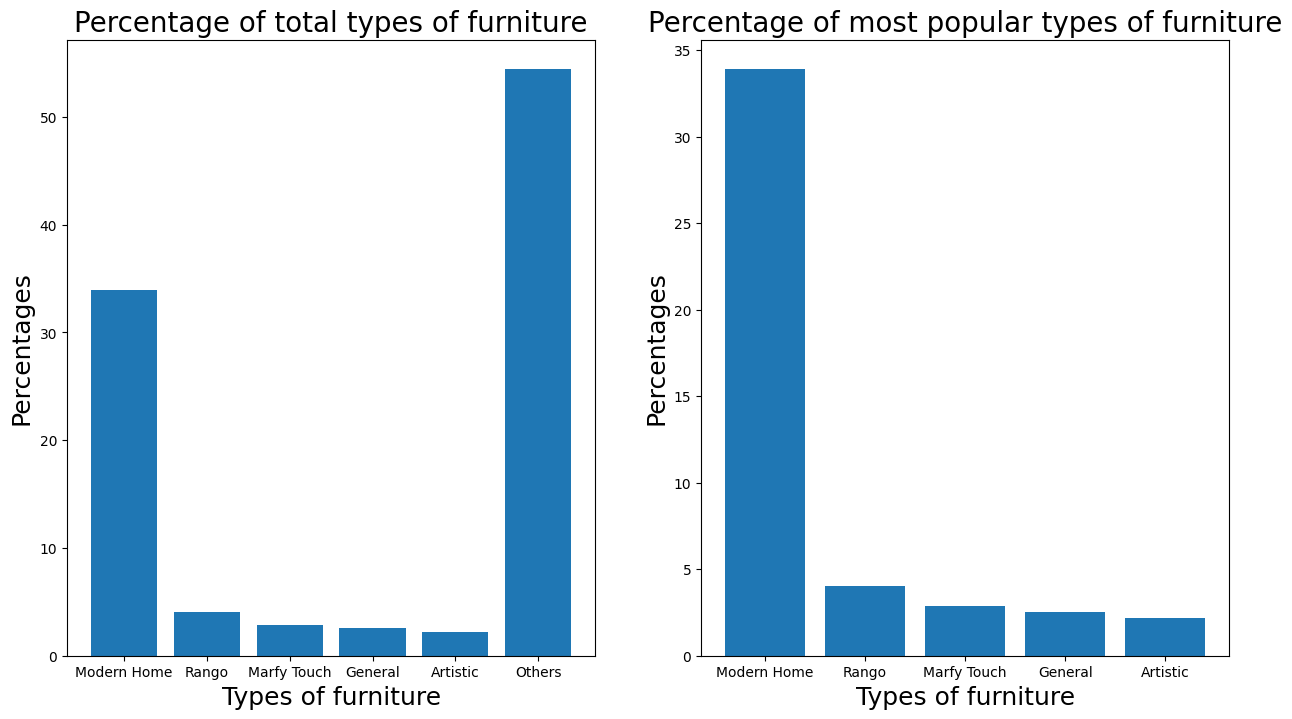

In [30]:
percentages = [33.9, 4.05, 2.85, 2.55, 2.20, 54.45]
labels = ["Modern Home", "Rango", "Marfy Touch", "General", "Artistic", "Others"]

fig = plt.figure(figsize=(15,8))
fig.clf()
ax = fig.subplots(1,2)

ax[0].bar(labels,percentages)
ax[0].set_xlabel("Types of furniture",fontsize=18)
ax[0].set_ylabel("Percentages",fontsize=18)
ax[0].set_title("Percentage of total types of furniture",fontsize=20)

ax[1].bar(labels[:5],percentages[:5])
ax[1].set_xlabel("Types of furniture",fontsize=18)
ax[1].set_ylabel("Percentages",fontsize=18)
ax[1].set_title("Percentage of most popular types of furniture",fontsize=20)


In [71]:
MH = pd.DataFrame(datos.loc[datos["type"]==272.0, "furniture"])
MH

,furniture
1,193.0
2,746.0
3,199.0
4,1140.0
6,759.0
...,...
1978,351.0
1979,347.0
1980,348.0
1983,560.0


In [72]:
print(min(MH["furniture"]),max(MH["furniture"]))

24.0 1223.0


In [73]:
repetidos_type_MH = MH.value_counts()
print(repetidos_type_MH)

furniture
1194.0       27
750.0        23
783.0        19
785.0        16
215.0        12
             ..
275.0         1
671.0         1
678.0         1
686.0         1
231.0         1
Length: 345, dtype: int64


In [74]:
#percentage of most popular furnitures in Modern Home
repetidostype_MH_P = repetidos_type_MH*100/678
repetidostype_MH_P[:13]

furniture
1194.0       3.982301
750.0        3.392330
783.0        2.802360
785.0        2.359882
215.0        1.769912
746.0        1.622419
544.0        1.327434
765.0        1.327434
208.0        1.179941
211.0        1.179941
199.0        1.179941
899.0        1.179941
347.0        1.032448
dtype: float64

In [75]:
datos.loc[datos["furniture"]==1194.0]

,furniture,type,url,rate,delivery,sale,price
13,1194.0,272.0,https://www.jumia.com.eg//ar/generic-tv-table-...,0.0,172.14,0.68,3000.0
29,1194.0,272.0,https://www.jumia.com.eg//ar/generic-tv-table-...,0.0,172.14,0.58,3000.0
31,1194.0,272.0,https://www.jumia.com.eg//ar/generic-tv-table-...,0.0,172.14,0.70,3000.0
35,1194.0,272.0,https://www.jumia.com.eg//ar/generic-tv-table-...,0.0,172.14,0.68,3000.0
36,1194.0,272.0,https://www.jumia.com.eg//ar/generic-tv-table-...,0.0,172.14,0.68,3000.0
53,1194.0,272.0,https://www.jumia.com.eg//ar/generic-tv-table-...,0.0,172.14,0.68,3000.0
69,1194.0,272.0,https://www.jumia.com.eg//ar/generic-tv-table-...,0.0,172.14,0.58,3000.0
71,1194.0,272.0,https://www.jumia.com.eg//ar/generic-tv-table-...,0.0,172.14,0.70,3000.0
75,1194.0,272.0,https://www.jumia.com.eg//ar/generic-tv-table-...,0.0,172.14,0.68,3000.0
76,1194.0,272.0,https://www.jumia.com.eg//ar/generic-tv-table-...,0.0,172.14,0.68,3000.0


In [76]:
price1 = datos.loc[datos["furniture"]==1194.0, "price"]
price1

13      3000.0
29      3000.0
31      3000.0
35      3000.0
36      3000.0
53      3000.0
69      3000.0
71      3000.0
75      3000.0
76      3000.0
81      3000.0
83      3000.0
85      3000.0
122     3000.0
140     3000.0
157     3000.0
188     3000.0
265     3000.0
320     3000.0
426     3000.0
449     3000.0
581     3000.0
669     3000.0
769     3000.0
836     3000.0
1143    3000.0
1789    3000.0
Name: price, dtype: float64

In [77]:
data.iloc[13]

furniture                                          cm TV table
type                                               Modern Home
url          https://www.jumia.com.eg//ar/generic-tv-table-...
rate                                                       0.0
delivery                                                172.14
sale                                                      0.68
price                                                   3000.0
Name: 13, dtype: object

cm TV table is the most popular furniture in Modern Home

In [78]:
datos.loc[datos["furniture"]==750.0]
print(data.iloc[165])

furniture                           Modern capton bed, cm wood
type                                               Modern Home
url          https://www.jumia.com.eg//ar/generic-stylish-m...
rate                                                       5.0
delivery                                                172.14
sale                                                       0.0
price                                                   3500.0
Name: 165, dtype: object


In [79]:
datos.loc[datos["furniture"]==783.0]

,furniture,type,url,rate,delivery,sale,price
237,783.0,272.0,https://www.jumia.com.eg//ar/generic-mattress-...,0.0,172.14,0.18,4599.0
268,783.0,272.0,https://www.jumia.com.eg//ar/generic-mattress-...,4.0,172.14,0.27,3500.0
295,783.0,272.0,https://www.jumia.com.eg//ar/generic-mattress-...,5.0,172.14,0.16,4899.0
303,783.0,272.0,https://www.jumia.com.eg//ar/generic-mattress-...,0.0,172.14,0.36,3566.0
316,783.0,272.0,https://www.jumia.com.eg//ar/generic-mattress-...,0.0,172.14,0.25,4000.0
366,783.0,272.0,https://www.jumia.com.eg//ar/generic-mattress-...,5.0,172.14,0.12,4599.0
414,783.0,272.0,https://www.jumia.com.eg//ar/generic-mora-matt...,0.0,172.14,0.17,4999.0
578,783.0,272.0,https://www.jumia.com.eg//ar/generic-mattress-...,5.0,172.14,0.34,3899.0
821,783.0,272.0,https://www.jumia.com.eg//ar/generic-mora-matt...,4.5,172.14,0.00,4500.0
878,783.0,272.0,https://www.jumia.com.eg//ar/generic-mattress-...,0.0,172.14,0.26,4199.0


In [80]:
price2 = datos.loc[datos["furniture"]==783.0, "price"]

In [81]:
data.iloc[883]

furniture     Mora mattress, ten years guarantee, size is high
type                                               Modern Home
url          https://www.jumia.com.eg//ar/generic-mattress-...
rate                                                       3.0
delivery                                                172.14
sale                                                      0.32
price                                                   4400.0
Name: 883, dtype: object

In [82]:
datos.loc[datos["furniture"]==785.0]

,furniture,type,url,rate,delivery,sale,price
137,785.0,272.0,https://www.jumia.com.eg//ar/generic-medical-m...,5.0,172.14,0.25,4800.0
145,785.0,272.0,https://www.jumia.com.eg//ar/generic-medical-m...,5.0,172.14,0.20,4999.0
158,785.0,272.0,https://www.jumia.com.eg//ar/generic-medical-m...,0.0,172.14,0.00,3500.0
259,785.0,272.0,https://www.jumia.com.eg//ar/generic-medical-m...,0.0,172.14,0.17,3500.0
364,785.0,272.0,https://www.jumia.com.eg//ar/generic-medical-m...,5.0,172.14,0.14,4999.0
434,785.0,272.0,https://www.jumia.com.eg//ar/generic-medical-m...,0.0,172.14,0.23,5699.0
542,785.0,272.0,https://www.jumia.com.eg//ar/generic-medical-m...,0.0,172.14,0.19,4800.0
663,785.0,272.0,https://www.jumia.com.eg//ar/generic-medical-m...,1.0,172.14,0.06,4699.0
688,785.0,272.0,https://www.jumia.com.eg//ar/generic-medical-m...,0.0,172.14,0.13,3800.0
719,785.0,272.0,https://www.jumia.com.eg//ar/generic-medical-m...,0.0,172.14,0.30,4599.0


In [83]:
price3 = datos.loc[datos["furniture"]==785.0, "price"]

In [84]:
data.iloc[1833]

furniture    Mora medical mattress, ten years guarantee. Th...
type                                               Modern Home
url          https://www.jumia.com.eg//ar/generic-medical-m...
rate                                                       0.0
delivery                                                172.14
sale                                                      0.16
price                                                   5500.0
Name: 1833, dtype: object

In [85]:
datos.loc[datos["furniture"]==215.0]

,furniture,type,url,rate,delivery,sale,price
519,215.0,272.0,https://www.jumia.com.eg//ar/big-storage-sofa-...,3.0,172.14,0.1,5000.0
916,215.0,272.0,https://www.jumia.com.eg//ar/big-storage-sofa-...,0.0,172.14,0.1,5000.0
929,215.0,272.0,https://www.jumia.com.eg//ar/big-storage-sofa-...,1.0,172.14,0.1,5000.0
979,215.0,272.0,https://www.jumia.com.eg//ar/big-storage-sofa-...,0.0,172.14,0.1,5000.0
991,215.0,272.0,https://www.jumia.com.eg//ar/big-storage-sofa-...,2.0,172.14,0.1,5000.0
992,215.0,272.0,https://www.jumia.com.eg//ar/big-storage-sofa-...,0.0,172.14,0.1,5000.0
1020,215.0,272.0,https://www.jumia.com.eg//ar/big-storage-sofa-...,0.0,172.14,0.1,5000.0
1117,215.0,272.0,https://www.jumia.com.eg//ar/big-storage-sofa-...,0.0,172.14,0.1,5000.0
1206,215.0,272.0,https://www.jumia.com.eg//ar/big-storage-sofa-...,0.0,172.14,0.1,5000.0
1313,215.0,272.0,https://www.jumia.com.eg//ar/big-storage-sofa-...,0.0,172.14,0.1,5000.0


In [86]:
price4 = datos.loc[datos["furniture"]==215.0,"price"]

In [87]:
data.iloc[1436]

furniture                                      Beige sofa bed 
type                                               Modern Home
url          https://www.jumia.com.eg//ar/storage-sofa-bed-...
rate                                                       0.0
delivery                                                172.14
sale                                                       0.1
price                                                   5000.0
Name: 1436, dtype: object

In [88]:
datos.loc[datos["furniture"]==746.0]

,furniture,type,url,rate,delivery,sale,price
2,746.0,272.0,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,0.18,1099.0
9,746.0,272.0,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,0.18,1099.0
14,746.0,272.0,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,0.18,1099.0
18,746.0,272.0,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,0.18,1099.0
42,746.0,272.0,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,0.18,1099.0
49,746.0,272.0,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,0.18,1099.0
54,746.0,272.0,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,0.18,1099.0
58,746.0,272.0,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,0.18,1099.0
115,746.0,272.0,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,0.18,1099.0
116,746.0,272.0,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,0.18,1099.0


In [89]:
price5 = datos.loc[datos["furniture"]==746.0,"price"]

In [90]:
data.iloc[118]

furniture                              Modern Zigzag TV Table 
type                                               Modern Home
url          https://www.jumia.com.eg//ar/generic-zigzag-tv...
rate                                                       0.0
delivery                                                172.14
sale                                                      0.18
price                                                   1099.0
Name: 118, dtype: object

In [91]:
datos.loc[datos["furniture"]==544.0]

,furniture,type,url,rate,delivery,sale,price
391,544.0,272.0,https://www.jumia.com.eg//ar/generic-home-gall...,0.0,52.44,0.17,3450.0
537,544.0,272.0,https://www.jumia.com.eg//ar/generic-tv-unit-4...,0.0,52.44,0.61,3500.0
589,544.0,272.0,https://www.jumia.com.eg//ar/generic-home-gall...,0.0,52.44,0.17,2238.0
594,544.0,272.0,https://www.jumia.com.eg//ar/generic-home-gall...,0.0,52.44,0.17,5370.0
802,544.0,272.0,https://www.jumia.com.eg//ar/generic-tv-unit-4...,0.0,52.44,0.21,1200.0
807,544.0,272.0,https://www.jumia.com.eg//ar/generic-home-gall...,0.0,52.44,0.17,5334.0
857,544.0,272.0,https://www.jumia.com.eg//ar/generic-home-gall...,0.0,52.44,0.17,5334.0
915,544.0,272.0,https://www.jumia.com.eg//ar/generic-home-gall...,0.0,52.44,0.17,2730.0
1155,544.0,272.0,https://www.jumia.com.eg//ar/generic-home-gall...,0.0,52.44,0.17,4482.0


In [92]:
data.iloc[1155]

furniture                     Home Gallery Brown White TV Unit
type                                               Modern Home
url          https://www.jumia.com.eg//ar/generic-home-gall...
rate                                                       0.0
delivery                                                 52.44
sale                                                      0.17
price                                                   4482.0
Name: 1155, dtype: object

In [93]:
datos.loc[datos["furniture"]==765.0]

,furniture,type,url,rate,delivery,sale,price
141,765.0,272.0,https://www.jumia.com.eg//ar/generic-modern-ho...,0.0,52.44,0.0,860.0
246,765.0,272.0,https://www.jumia.com.eg//ar/generic-modern-ho...,0.0,52.44,0.0,700.0
346,765.0,272.0,https://www.jumia.com.eg//ar/generic-modern-ho...,0.0,52.44,0.0,860.0
493,765.0,272.0,https://www.jumia.com.eg//ar/generic-modern-ho...,0.0,52.44,0.0,860.0
624,765.0,272.0,https://www.jumia.com.eg//ar/generic-modern-ho...,0.0,52.44,0.0,860.0
644,765.0,272.0,https://www.jumia.com.eg//ar/generic-modern-ho...,0.0,52.44,0.0,860.0
1238,765.0,272.0,https://www.jumia.com.eg//ar/generic-modern-ho...,0.0,52.44,0.0,860.0
1465,765.0,272.0,https://www.jumia.com.eg//ar/generic-modern-ho...,0.0,52.44,0.0,860.0
1675,765.0,272.0,https://www.jumia.com.eg//ar/generic-modern-ho...,0.0,52.44,0.0,860.0


In [94]:
data.iloc[1675]

furniture                            Modern home office design
type                                               Modern Home
url          https://www.jumia.com.eg//ar/generic-modern-ho...
rate                                                       0.0
delivery                                                 52.44
sale                                                       0.0
price                                                    860.0
Name: 1675, dtype: object

In [95]:
datos.loc[datos["furniture"]==208.0]

,furniture,type,url,rate,delivery,sale,price
104,208.0,272.0,https://www.jumia.com.eg//ar/big-super-sofa-be...,4.0,172.14,0.17,3500.0
132,208.0,272.0,https://www.jumia.com.eg//ar/big-super-sofa-be...,4.7,172.14,0.17,3500.0
171,208.0,272.0,https://www.jumia.com.eg//ar/big-super-sofa-be...,3.5,172.14,0.17,3500.0
254,208.0,272.0,https://www.jumia.com.eg//ar/big-super-sofa-be...,0.0,172.14,0.17,3500.0
280,208.0,272.0,https://www.jumia.com.eg//ar/big-super-sofa-be...,0.0,172.14,0.17,3500.0
406,208.0,272.0,https://www.jumia.com.eg//ar/big-super-sofa-be...,5.0,172.14,0.17,3500.0
620,208.0,272.0,https://www.jumia.com.eg//ar/big-super-sofa-be...,0.0,172.14,0.17,3500.0
1166,208.0,272.0,https://www.jumia.com.eg//ar/big-super-sofa-be...,0.0,172.14,0.17,3500.0


In [96]:
data.iloc[1166]

furniture                                Beige Super Sofa Bed 
type                                               Modern Home
url          https://www.jumia.com.eg//ar/big-super-sofa-be...
rate                                                       0.0
delivery                                                172.14
sale                                                      0.17
price                                                   3500.0
Name: 1166, dtype: object

In [97]:
datos.loc[datos["furniture"]==211.0]

,furniture,type,url,rate,delivery,sale,price
284,211.0,272.0,https://www.jumia.com.eg//ar/big-classic-sofa-...,5.0,172.14,0.30,4000.0
319,211.0,272.0,https://www.jumia.com.eg//ar/big-classic-sofa-...,0.0,172.14,0.30,4000.0
326,211.0,272.0,https://www.jumia.com.eg//ar/big-classic-sofa-...,0.0,172.14,0.30,4000.0
337,211.0,272.0,https://www.jumia.com.eg//ar/big-classic-sofa-...,0.0,172.14,0.30,4000.0
389,211.0,272.0,https://www.jumia.com.eg//ar/big-classic-sofa-...,5.0,172.14,0.30,4000.0
793,211.0,272.0,https://www.jumia.com.eg//ar/big-classic-sofa-...,0.0,172.14,0.30,4000.0
1397,211.0,272.0,https://www.jumia.com.eg//ar/big-classic-sofa-...,0.0,172.14,0.28,4000.0
1401,211.0,272.0,https://www.jumia.com.eg//ar/big-classic-sofa-...,0.0,172.14,0.28,4000.0


In [98]:
data.iloc[1401]

furniture                              Beige classic sofa bed 
type                                               Modern Home
url          https://www.jumia.com.eg//ar/big-classic-sofa-...
rate                                                       0.0
delivery                                                172.14
sale                                                      0.28
price                                                   4000.0
Name: 1401, dtype: object

In [99]:
datos.loc[datos["furniture"]==199.0]

,furniture,type,url,rate,delivery,sale,price
3,199.0,272.0,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,0.58,1200.0
43,199.0,272.0,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,0.58,1200.0
108,199.0,272.0,https://www.jumia.com.eg//ar/bedside-table-sid...,4.4,172.14,0.56,1100.0
121,199.0,272.0,https://www.jumia.com.eg//ar/modern-home-bedsi...,4.3,172.14,0.56,1100.0
242,199.0,272.0,https://www.jumia.com.eg//ar/bedside-table-sid...,3.8,172.14,0.38,800.0
299,199.0,272.0,https://www.jumia.com.eg//ar/generic-bedside-t...,0.0,172.14,0.68,2500.0
308,199.0,272.0,https://www.jumia.com.eg//ar/generic-bedside-t...,0.0,172.14,0.70,2500.0
395,199.0,272.0,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,0.58,1200.0
586,199.0,145.0,https://www.jumia.com.eg//ar/general-bedside-t...,0.0,172.14,0.55,1050.0
603,199.0,145.0,https://www.jumia.com.eg//ar/general-bedside-t...,0.0,172.14,0.57,1050.0


In [100]:
data.iloc[990]

furniture                    Bedside table with storage shelf 
type                                                   General
url          https://www.jumia.com.eg//ar/general-bedside-t...
rate                                                       0.0
delivery                                                172.14
sale                                                       0.0
price                                                   1100.0
Name: 990, dtype: object

In [101]:
datos.loc[datos["furniture"]==899.0]

,furniture,type,url,rate,delivery,sale,price
234,899.0,272.0,https://www.jumia.com.eg//ar/big-brimo-sofa-be...,0.0,172.14,0.13,4500.0
343,899.0,272.0,https://www.jumia.com.eg//ar/big-brimo-sofa-be...,0.0,172.14,0.13,4500.0
497,899.0,272.0,https://www.jumia.com.eg//ar/big-brimo-sofa-be...,0.0,172.14,0.13,4500.0
518,899.0,272.0,https://www.jumia.com.eg//ar/big-brimo-sofa-be...,3.0,172.14,0.13,4500.0
585,899.0,272.0,https://www.jumia.com.eg//ar/big-brimo-sofa-be...,0.0,172.14,0.22,4999.0
1133,899.0,272.0,https://www.jumia.com.eg//ar/big-brimo-sofa-be...,0.0,172.14,0.13,4500.0
1243,899.0,272.0,https://www.jumia.com.eg//ar/big-brimo-sofa-be...,0.0,172.14,0.13,4500.0
1566,899.0,272.0,https://www.jumia.com.eg//ar/big-brimo-sofa-be...,0.0,172.14,0.13,4500.0


In [102]:
data.iloc[1566]

furniture                           Primo sofa bed from beige 
type                                               Modern Home
url          https://www.jumia.com.eg//ar/big-brimo-sofa-be...
rate                                                       0.0
delivery                                                172.14
sale                                                      0.13
price                                                   4500.0
Name: 1566, dtype: object

In [103]:
datos.loc[datos["furniture"]==347.0]

,furniture,type,url,rate,delivery,sale,price
446,347.0,272.0,https://www.jumia.com.eg//ar/cozy-comfy-beanba...,0.0,52.44,0.0,499.0
495,347.0,272.0,https://www.jumia.com.eg//ar/cozy-comfy-beanba...,0.0,52.44,0.0,499.0
1023,347.0,272.0,https://www.jumia.com.eg//ar/cozy-comfy-beanba...,0.0,52.44,0.0,499.0
1546,347.0,272.0,https://www.jumia.com.eg//ar/cozy-comfy-beanba...,0.0,52.44,0.0,499.0
1716,347.0,272.0,https://www.jumia.com.eg//ar/cozy-comfy-beanba...,0.0,52.44,0.0,499.0
1717,347.0,272.0,https://www.jumia.com.eg//ar/cozy-comfy-beanba...,0.0,52.44,0.0,499.0
1979,347.0,272.0,https://www.jumia.com.eg//ar/cozy-comfy-beanba...,0.0,52.44,0.0,499.0


In [104]:
data.iloc[1979]

furniture                              Cozy Comfy Bean Bag ( )
type                                               Modern Home
url          https://www.jumia.com.eg//ar/cozy-comfy-beanba...
rate                                                       0.0
delivery                                                 52.44
sale                                                       0.0
price                                                    499.0
Name: 1979, dtype: object

Text(0.5, 1.0, 'Most popular furniture of Modern Home')

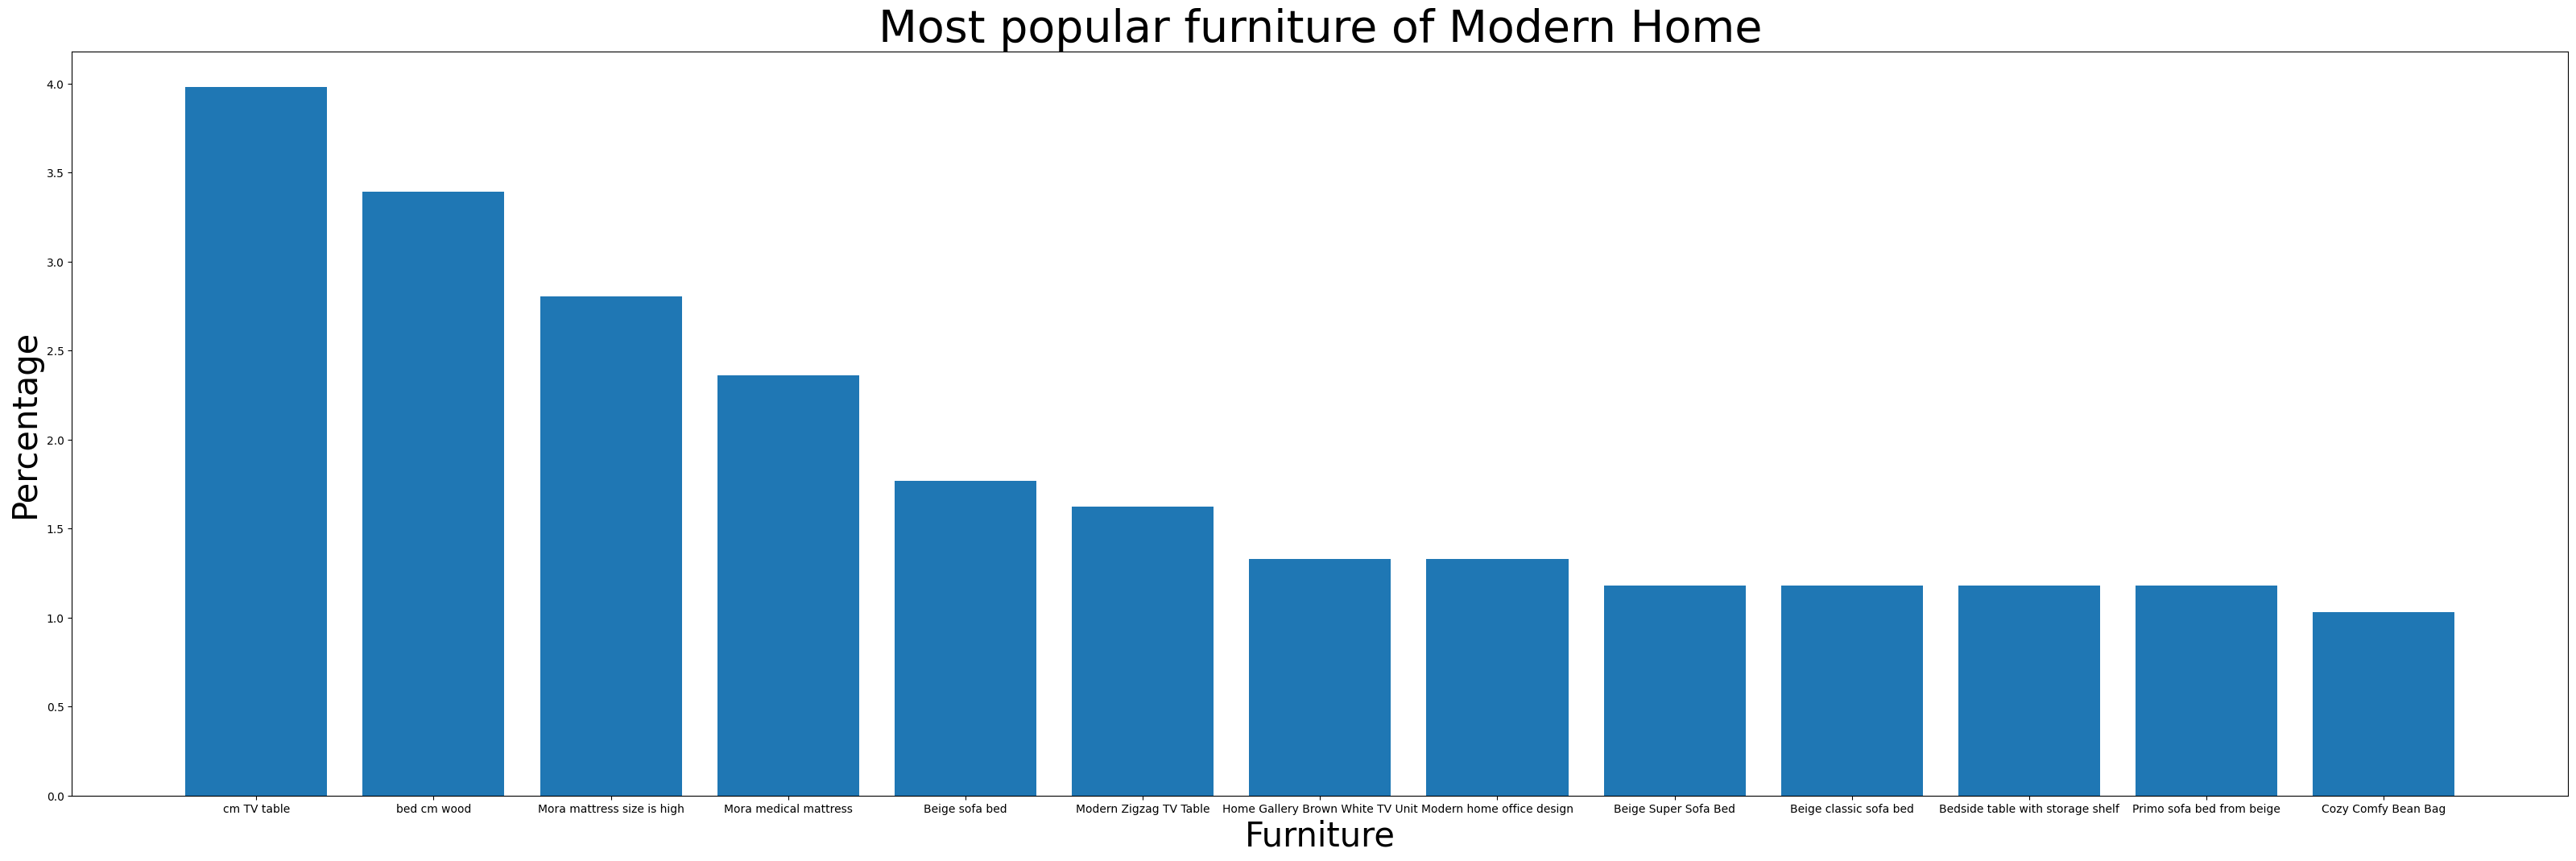

In [105]:
fig = plt.figure(figsize=(40,12))
labels_PMH = ["cm TV table","bed cm wood","Mora mattress size is high","Mora medical mattress","Beige sofa bed","Modern Zigzag TV Table","Home Gallery Brown White TV Unit","Modern home office design","Beige Super Sofa Bed","Beige classic sofa bed","Bedside table with storage shelf","Primo sofa bed from beige","Cozy Comfy Bean Bag"]
plt.bar(labels_PMH,repetidostype_MH_P[:13])
plt.xlabel("Furniture",fontsize=30)
plt.ylabel("Percentage",fontsize=30)
plt.title("Most popular furniture of Modern Home",fontsize=40)

In [106]:
#### Hacer grafico de como varian los precios segun types y furnitures

In [108]:
PriceMH.max()

NameError: name 'PriceMH' is not defined

In [109]:
PriceMH.min()

NameError: name 'PriceMH' is not defined

In [110]:
#ordering the prices from highest to lowest
sorted_highprices = sorted(datos.loc[datos["type"]==272.0, "price"],reverse=True)

In [111]:
data.loc[datos["price"]==20000.0]

,furniture,type,url,rate,delivery,sale,price
480,Natural wood dining table with 6 chairs,Modern Home,https://www.jumia.com.eg//ar/generic-natural-w...,0.0,172.14,0.0,20000.0


The most expensive piece of furniture is from Modem Home and is Natural wood dining table with 6 chairs

In [112]:
data.loc[datos["price"]==10500.0]

,furniture,type,url,rate,delivery,sale,price
512,Mobile manager office chair,Modern Home,https://www.jumia.com.eg//ar/manager-high-movi...,0.0,52.44,0.00,10500.0
544,Gaming chair _ movable hands,Modern Home,https://www.jumia.com.eg//ar/generic-gaming-ch...,0.0,52.44,0.00,10500.0
550,"Red black gaming chair, movable hands",Modern Home,https://www.jumia.com.eg//ar/generic-gaming-ch...,0.0,52.44,0.12,10500.0
569,"A distinctive TV desk, size V",Marfy Touch,https://www.jumia.com.eg//ar/marfy-touch-moder...,3.0,52.44,0.28,10500.0
764,Black blue gaming chair _ movable hands,Modern Home,https://www.jumia.com.eg//ar/generic-gaming-ch...,0.0,52.44,0.12,10500.0
852,"A distinctive TV desk, size V",Marfy Touch,https://www.jumia.com.eg//ar/marfy-touch-moder...,5.0,52.44,0.28,10500.0
1228,Gaming Chair - Black/Red,Gaming Chair Black Red,https://www.jumia.com.eg//ar/generic-gaming-ch...,0.0,52.44,0.12,10500.0
1279,Marvo CH-107 Scorpion Adjustable Gaming Chair ...,Marvo CH Scorpion Adjustable Gaming Chair ...,https://www.jumia.com.eg//ar/ch-107-scorpion-a...,4.0,52.44,0.10,10500.0


The second most expensive pieces of furniture are Mobile manager office chair, Gaming chair _ movable hands,Red black gaming chair, movable hands,Black blue gaming chair _ movable hands, all corresponding to desk chairs.

In [113]:
data.loc[datos["price"]==9500.0]

,furniture,type,url,rate,delivery,sale,price
377,مطبخ قطعتين طول 120 سم مع دولاب تخزين بالتربو ...,Modern Home,https://www.jumia.com.eg//ar/generic-kitchen-t...,0.0,172.14,0.16,9500.0
950,Folding table + chairs,Artistico,https://www.jumia.com.eg//ar/artistico-folding...,0.0,52.44,0.17,9500.0
1336,Elegant Arabic Style Paravan - Brown,Elegant Arabic Style Paravan Brown,https://www.jumia.com.eg//ar/generic-elegant-a...,0.0,52.44,0.00,9500.0


The third most expensive piece of furniture is مطبخ قطعتين طول 120 سم مع دولاب تخزين بالتربو ..

In [114]:
data.loc[datos["price"]==9400.0]

,furniture,type,url,rate,delivery,sale,price
580,White,Modern Home,https://www.jumia.com.eg//ar/generic-metal-bun...,0.0,172.14,0.0,9400.0


The fourth most expensive piece of furniture is White

The fifth most expensive piece of furniture is Modern capton bed, cm wood and Coffee Table

In [115]:
labels_mef = ["Natural wood dining table with 6 chairs","Desk chairs","مطبخ قطعتين طول 120 سم مع دولاب تخزين بالتربو .."," White","Modern capton bed, cm wood and Coffee Table"]

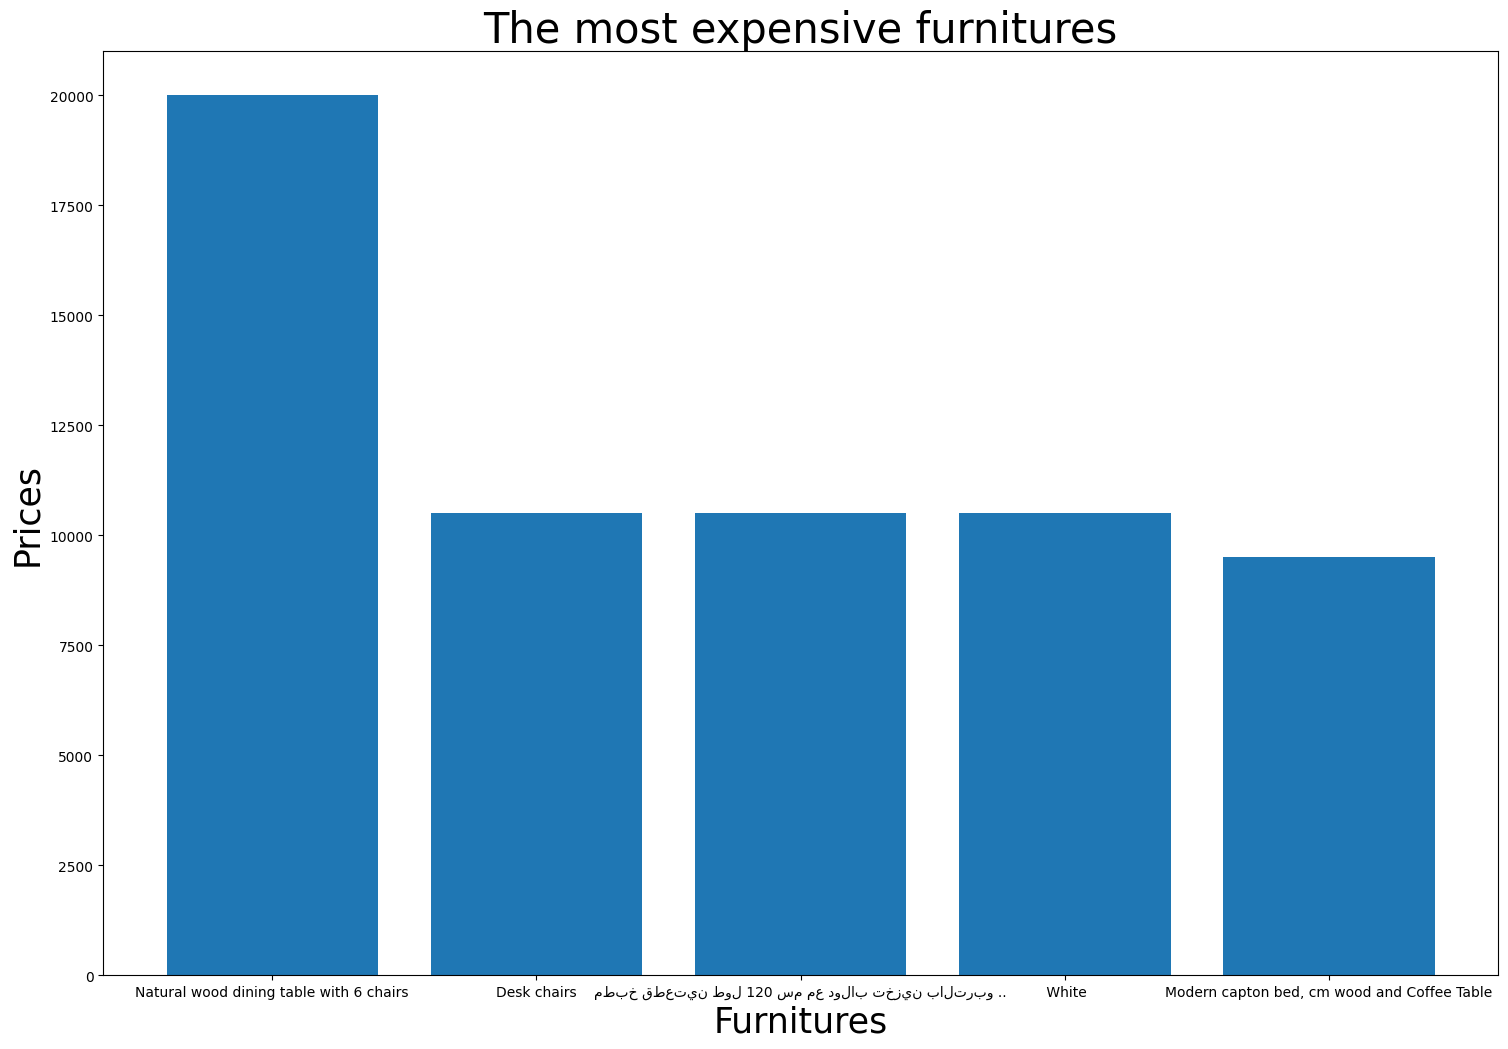

In [116]:
fig = plt.figure(figsize=(18,12))
plt.bar(labels_mef,sorted_highprices[:5])
plt.xlabel("Furnitures",fontsize=25)
plt.ylabel("Prices",fontsize=25)
plt.title("The most expensive furnitures",fontsize=30)
plt.show()

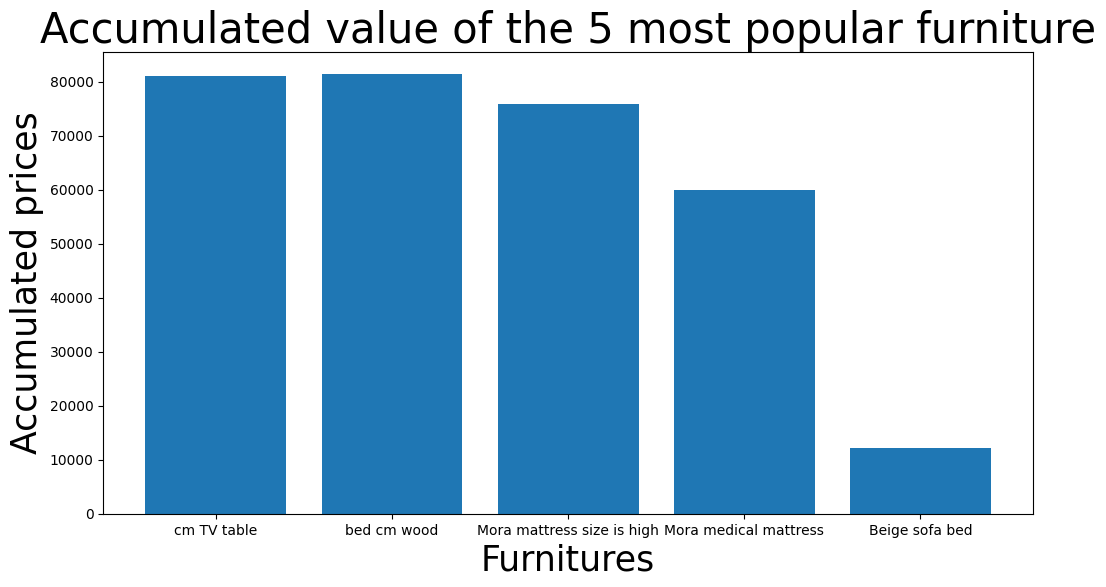

In [117]:
fig = plt.figure(figsize=(12,6))
prices_ac = [sum(price1),sum(price2),sum(price3),sum(price4),sum(price5)]
labels_ampf = ["cm TV table","bed cm wood","Mora mattress size is high","Mora medical mattress","Beige sofa bed"]
plt.bar(labels_ampf,prices_ac)
plt.xlabel("Furnitures",fontsize=25)
plt.ylabel("Accumulated prices",fontsize=25)
plt.title("Accumulated value of the 5 most popular furniture",fontsize=30)
plt.show()

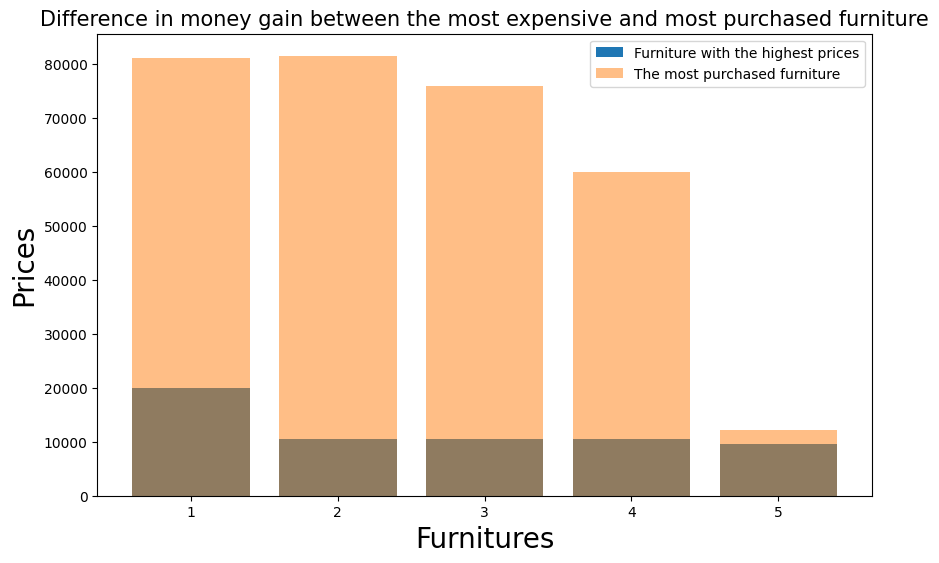

In [118]:
fig = plt.figure(figsize=(10,6))
label_representative = [1,2,3,4,5]
width = 0.5
plt.bar(label_representative ,sorted_highprices[:5],label="Furniture with the highest prices")
plt.bar(label_representative,prices_ac,label="The most purchased furniture",alpha=0.5)
plt.legend()
plt.xlabel("Furnitures",fontsize=20)
plt.ylabel("Prices",fontsize=20)
plt.title("Difference in money gain between the most expensive and most purchased furniture",fontsize=15)
plt.show()

We can see that the greatest inflow of money in observing the Modem Home type comes from the purchase of the most popular products and not the most expensive.